# Homework 1: Regression (50 points)

**Reading**: Data8 textbook chapters [15](https://www.inferentialthinking.com/chapters/15/Prediction) and [16](https://www.inferentialthinking.com/chapters/16/Inference_for_Regression.html).

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.
 
Homework 1 is due **Friday, April 8 at 6:00pm**.   You should start early so that you have time to get help if you're stuck. 

In [1]:
# Don't change this cell; just run it.
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# This notebook uses global.1751_2014.csv, co2_annmean_mlo.csv , btc.csv, eth.csv, and triple_vertical.csv 

In [ ]:
# Let us examine the Mona Loa atmospheric composition timeseries.
#  Dr. Pieter Tans, "Trends in Atmospheric Carbon Dioxide."  NOAA/GML (gml.noaa.gov/ccgg/trends/) and Dr. Ralph Keeling, Scripps Institution of Oceanography (scrippsco2.ucsd.edu/). 
# The data product we're after is the annual mean CO2 from 1960 to 2021:
# https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv


In [2]:
co = pd.read_csv("co2_annmean_mlo.csv", comment="#")
co["Mean"]= co["mean"]  # .mean() is a method 
co

,year,mean,unc,Mean
0,1959,315.98,0.12,315.98
1,1960,316.91,0.12,316.91
2,1961,317.64,0.12,317.64
3,1962,318.45,0.12,318.45
4,1963,318.99,0.12,318.99
...,...,...,...,...
58,2017,406.76,0.12,406.76
59,2018,408.72,0.12,408.72
60,2019,411.66,0.12,411.66
61,2020,414.24,0.12,414.24


Text(0, 0.5, 'atmospheric CO$_2$ at Mona Loa\n ppm in dry air')

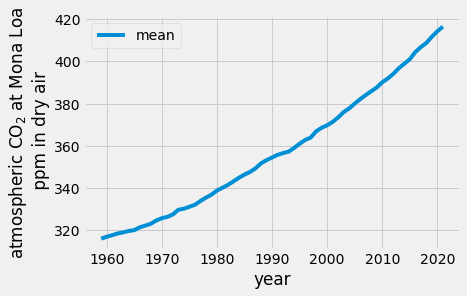

In [3]:
co.plot("year", "mean")
plt.ylabel("atmospheric CO$_2$ at Mona Loa\n ppm in dry air")

In [ ]:
# The briefest glance at this graph shows the measured quantity is increaing.
# A second glance shows that slope is increasing.  

**Question 1**  find and plot simple least-squares fit lines for the mean atmospheric
CO$_2$ data for the entire timeseries and for the first half ( 1959-1990) and second half(1991-2021).
For this problem, calculate the maximum-likelihood least-squares coefficients without using 
library functions for least-squares estimation.

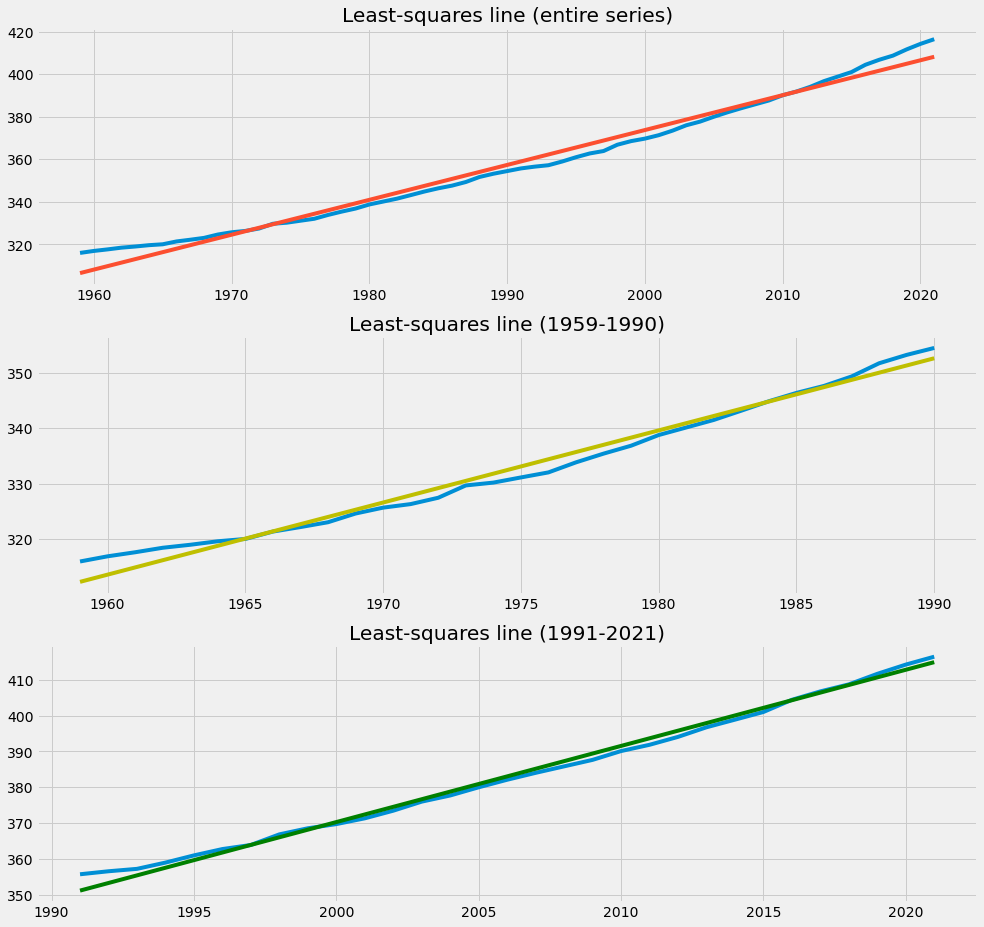

In [4]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  

#whole
x=(co.year-co.year.mean())/co.year.std()
y=(co["mean"]-co["mean"].mean())/co["mean"].std()
r=((x * y).sum())/(len(co)-1)
slope=np.cov(co.year,co["mean"])[1,0]/np.var(co.year)
inte=co["mean"].mean()-slope*co.year.mean()

#first half
first = co[co.year < 1991]
x_a=(first.year-first.year.mean())/first.year.std()
y_a=(first["mean"]-first["mean"].mean())/first["mean"].std()
r_a=((x_a * y_a).sum())/(len(first)-1)
slope_a=np.cov(first.year,first["mean"])[1,0]/np.var(first.year)
int_a=first["mean"].mean()-slope_a*first.year.mean()

#second half
second = co[co.year > 1990]
x_b=(second.year-second.year.mean())/second.year.std()
y_b=(second["mean"]-second["mean"].mean())/second["mean"].std()
r_b=((x_b * y_b).sum())/(len(second)-1)
slope_b=np.cov(second.year,second["mean"])[1,0]/np.var(second.year)
int_b=second["mean"].mean()-slope_b*second.year.mean()

fig, axs = plt.subplots(3,figsize=(15,15))
axs[0].plot(co["year"], co["mean"])
axs[0].plot(co.year,co.year*slope+inte)
axs[0].title.set_text('Least-squares line (entire series)')
axs[1].plot(first["year"], first["mean"])
axs[1].plot(first.year,first.year*slope_a+int_a, color = "y")
axs[1].title.set_text('Least-squares line (1959-1990)')
axs[2].plot(second["year"], second["mean"])
axs[2].plot(second.year,second.year*slope_b+int_b, color = "g")
axs[2].title.set_text('Least-squares line (1991-2021)')

#ask about 2 methods - close but not exactly the same

**Question 2**  What do the slopes mean?  Estimate the year the atmosphere will 
pass the 560 ppm "doubling of preindustrial atmospheric carbon" landmark.  

In [5]:
print("The slope means that, on average, the mean atmospheric CO2 concentration rises by", slope, "ppm per year.  Between 1959 and 1990, the mean concentration rose by", slope_a, "ppm per year and between 1991 and 2021, the mean concentration rose by", slope_b, "ppm.")
big_year = ((560-inte)/slope)
print("We estimate that the atmosphere will pass 560 ppm some time around the year", np.int(big_year))

The slope means that, on average, the mean atmospheric CO2 concentration rises by 1.640152347814776 ppm per year.  Between 1959 and 1990, the mean concentration rose by 1.2993983539873235 ppm per year and between 1991 and 2021, the mean concentration rose by 2.1261875 ppm.
We estimate that the atmosphere will pass 560 ppm some time around the year 2113


/var/folders/zb/cqngm18x18v4wmpfr61z84jc0000gn/T/ipykernel_8008/480811183.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print("We estimate that the atmosphere will pass 560 ppm some time around the year", np.int(big_year))


Remember the calculus operation to find slopes is differentiation, but 
this is data sampled at regular intervals, not a continuous function, so
we can approximate the derivative with finite differences:

`np.diff(y) / np.diff(x)` gives us n-1 estimates of dy/dx.

(Why is it n-1?)


Text(0, 0.5, 'mean CO$_2$ difference\n ppm year-over-year')

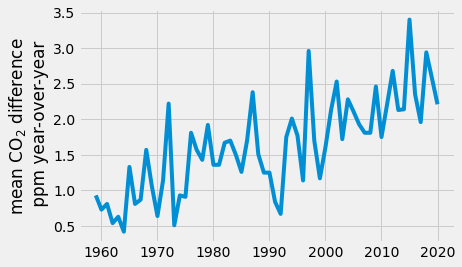

In [8]:
plt.plot(co.year[:-1], np.diff(co["Mean"]))
plt.ylabel("mean CO$_2$ difference\n ppm year-over-year")

In [9]:
early = co.query("year < 1990")
late = co.query("year >=1990 & year < 2021")
len(early), len(late)

(31, 31)

Text(0, 0.5, 'Global Carbon (MMT), estimated')

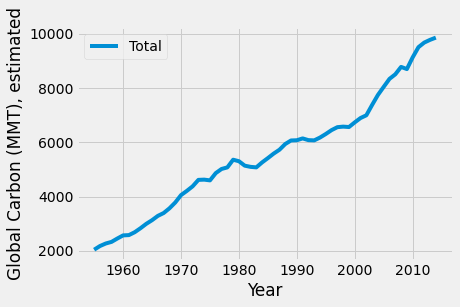

In [8]:
# There isn't a big mystery about where this excess carbon dioxide 
# is coming from, it's human economic activity tied to the production
# of energy and construction materials.

# Boden, T.A., Marland, G., and Andres, R.J. (2017). Global, Regional, and National Fossil-Fuel CO2 Emissions. Carbon Dioxide Information Analysis Center, Oak Ridge National Laboratory, U.S. Department of Energy, Oak Ridge, Tenn., U.S.A. doi 10.3334/CDIAC/00001_V2017.
    
emissions = pd.read_csv("global.1751_2014.csv", comment="#", sep="\t")

emissions[-60:].plot("Year", "Total")
plt.ylabel("Global Carbon (MMT), estimated")

**Question 3** 
Find a simple-least-squares regression line for the relationship between year-over-year 
atmospheric CO$_2$ concentration difference and the estimated world production of CO$_2$.
Interpret the slope coefficient.

The slope means that, when the YoY difference in CO2 concentraton rises by 1 (CO2 concentration rises from one year to the next), total world production of CO2 is estimated to rise by 2343.7789351269075 ppm.  The positive slope value indicates that world production is generally positive and increasing.


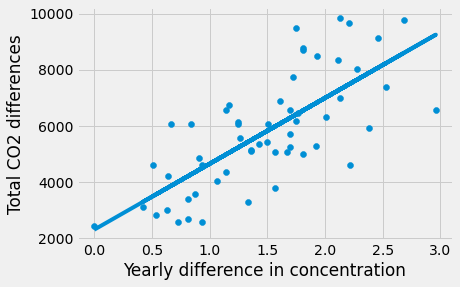

In [10]:
co["difference"] = co["mean"].diff().fillna(0)
trial = co.rename(columns = {"year": "Year"})
both = trial.merge(emissions, on = "Year")
slope=np.cov(both["difference"],both["Total"])[1,0]/np.var(both["difference"])
inte=both["Total"].mean()-slope*both["difference"].mean()
plt.scatter(both["difference"], both["Total"])
plt.plot(both["difference"], both["difference"]*slope + inte)
plt.xlabel("Yearly difference in concentration")
plt.ylabel("Total CO2 differences")

#Interpretation of slope:
print("The slope means that, when the YoY difference in CO2 concentraton rises by 1 (CO2 concentration rises from one year to the next), total world production of CO2 is estimated to rise by", slope, "ppm.  The positive slope value indicates that world production is generally positive and increasing.")

## 2. Triple Jump Distances vs. Vertical Jump Heights (15 points)

Does skill in one sport imply skill in a related sport?  The answer might be different for different activities.  Let us find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) (an horizontal jump similar to a long jump) and the vertical jump.  Since we're learning about linear regression, we will look specifically for a *linear* association between skill in the two sports.

The following data was collected by observing 40 collegiate level soccer players.  Each athlete's distances in both jump activities were measured in centimeters. Run the cell below to load the data into a pandas data frame.


In [11]:
jumps_df = pd.read_csv('triple_vertical.csv')
jumps_df.head(5)

,triple,vertical
0,383.00,33.00
1,781.00,71.10
2,561.62,62.25
3,624.52,61.33
4,446.24,40.19


#### Question 4
Before running a regression, it's important to see what the data look like, because our eyes are good at picking out unusual patterns in data.  Draw a scatter plot with the triple jump distances on the horizontal axis and the vertical jump heights on vertical axis **that also shows: (i) the least squares line; and (ii) the least absolute deviations line (minimizing MAE)**.  

Text(0, 0.5, 'Vertical jump distance (cm)')

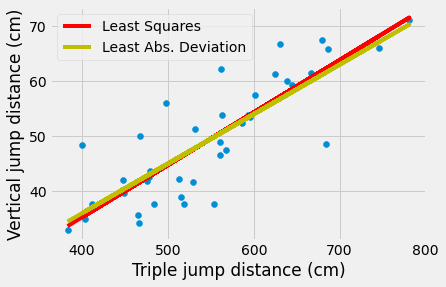

In [14]:
#part 1
sloper=np.cov(jumps_df.triple,jumps_df.vertical)[1,0]/np.var(jumps_df.triple)
inter=jumps_df.vertical.mean()-sloper*jumps_df.triple.mean()

#part 2
from datascience import *

def LADL(b0,b1):
    estimate = b0 + b1*jumps_df["triple"]
    return(np.mean(np.abs(jumps_df.vertical-estimate)))
           
ang = minimize(LADL, method="CG")

plt.scatter(jumps_df.triple, jumps_df.vertical)
plt.plot(jumps_df.triple, (jumps_df.triple)*sloper + inter, color="r", label = "Least Squares")
plt.plot(jumps_df.triple, jumps_df.triple*ang[1]+ang[0], color="y", label = "Least Abs. Deviation")
plt.legend()
plt.xlabel("Triple jump distance (cm)")
plt.ylabel("Vertical jump distance (cm)")

##### Question 5
Create a function called `regression_parameters`. It takes as its argument a data frame with two columns.  The first column is the predictor (x-variable), and the second column is the response variable (y-variable). It should compute the correlation between the two columns, then compute the slope and intercept of the regression line that predicts the second column from the first, in original units (centimeters).  It should return an array with three elements: the correlation coefficient of the two columns, the slope of the regression line, and the intercept of the regression line.

In [15]:
def regression_parameters(df):
    x=df.iloc[:, 0]
    y=df.iloc[:, 1]
    x_standard=(x-x.mean())/x.std()
    y_standard=(y-y.mean())/y.std()
    # Our solution had 4 lines above this one; you may use more or less than that
    r = np.sum(x_standard * y_standard)/(len(df)-1)
    slopey=np.cov(x,y)[1,0]/np.var(x)
    intey=y.mean()-slopey*x.mean()
    return np.array([r, slopey, intey])

# When your function is finished, the next lines should
# compute the regression line predicting vertical jump 
# distances from triple jump distances. Set parameters
# to be the result of calling regression_parameters appropriately.
parameters = regression_parameters(jumps_df)
print('r:', parameters.item(0), '; slope:', parameters.item(1), '; intercept:', parameters.item(2))

r: 0.8343076972837596 ; slope: 0.09534080164627881 ; intercept: -2.870784331244586


#### Question 6
Let's use `parameters` to predict what certain athletes' vertical jump heights would be given their triple jump distances.

The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. What's our prediction for what Edwards' vertical jump would be?

In [16]:
triple_record_vert_est = 1829*parameters.item(1)+parameters.item(2)
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

Predicted vertical jump distance: 171.507542 centimeters


#### Question 7
Do you expect this estimate to be accurate within a few centimeters? Why or why not?


I expect that this result may not be accurate within a few centimeters, because the world-record holder for triple jumps would prioritize training in horizontal distance over vertical distance.  Thus, this estimate likely overestimates the vertical jump height of Johnathan Edwards.  Furthermore, given that the current world record for the vertical jump is roughly 122 centimeters, it is unlikely that Johnathan Edwards could break such a record by such a significant margin.

## 3. Cryptocurrencies (21 points)

Imagine you're an investor in December 2017. Cryptocurrencies, online currencies backed by secure software, are becoming extremely valuable, and you want in on the action!

The two most valuable crpytocurrencies are Bitcoin (BTC) and Ethereum (ETH). Each one has a dollar price attatched to it at any given moment in time. For example, on December 1st, 2017, one BTC costs $\$$10859.56 and one ETH costs $\$$424.64. 

**You want to predict the price of ETH at some point in time based on the price of BTC.** 

There is a larger datset on [Kaggle](https://www.kaggle.com/jessevent/all-crypto-currencies/data) from which we obtained two tables called `btc` and `eth`. Each has 5 columns:
* `date`, the date
* `open`, the value of the currency at the beginning of the day
* `close`, the value of the currency at the end of the day
* `market`, the market cap or total dollar value invested in the currency
* `day`, the number of days since the start of our data

In [17]:
btc_df=pd.read_csv('btc.csv')
btc_df.head(10)

,date,open,close,market,day
0,2015-09-29,239.02,236.69,3505090000,1
1,2015-09-30,236.64,236.06,3471280000,2
2,2015-10-01,236.00,237.55,3462800000,3
3,2015-10-02,237.26,237.29,3482190000,4
4,2015-10-03,237.20,238.73,3482100000,5
5,2015-10-04,238.53,238.26,3502460000,6
6,2015-10-05,238.15,240.38,3497740000,7
7,2015-10-06,240.36,246.06,3531230000,8
8,2015-10-07,246.17,242.97,3617400000,9
9,2015-10-08,243.07,242.30,3572730000,10


In [18]:
eth_df=pd.read_csv('eth.csv')
eth_df.head(10)

,date,open,close,market,day
0,2015-09-29,0.579414,0.661146,42607700,1
1,2015-09-30,0.661192,0.738644,48636600,2
2,2015-10-01,0.734307,0.690215,54032300,3
3,2015-10-02,0.683732,0.678574,50328700,4
4,2015-10-03,0.678783,0.687171,49981900,5
5,2015-10-04,0.686343,0.668379,50556000,6
6,2015-10-05,0.666784,0.628643,49131600,7
7,2015-10-06,0.622218,0.650645,45863300,8
8,2015-10-07,0.650515,0.609388,47964700,9
9,2015-10-08,0.609501,0.621716,44955900,10


#### Question 8

In some of the questions below, we will need to pair the daily 'btc' and 'eth' price data. A simple way is to use the corresponding columns in the two data frames (assuming that they correspond to the same dates). Verify that all the rows in the two data frames correspond to the same dates. You can see this for the first 10 observations by looking at the date columns above.



In [20]:
date1=btc_df.iloc[:, 0]
date2=eth_df.iloc[:, 0]

d=True

for i in range(len(date1)):
    for j in range(len(date2)):
        if len(date1)!=len(date2):
            break
        else:
            if date1[i]!=date2[i]:
                d = False
        
print("It is", d, "that the dates match.")

It is True that the dates match.



#### Question 9

In the cell below, make one or two plots to investigate the opening prices of BTC and ETH as a function of time. Then comment on whether you think the values are correlated.

They appear to be somewhat correlated, as both of their closing values rise over time.  Furthermore, the slopes of both graphs appear to grow faster and slower at the same points in time, indicating correlation.

Text(0, 0.5, 'Opening price ($)')

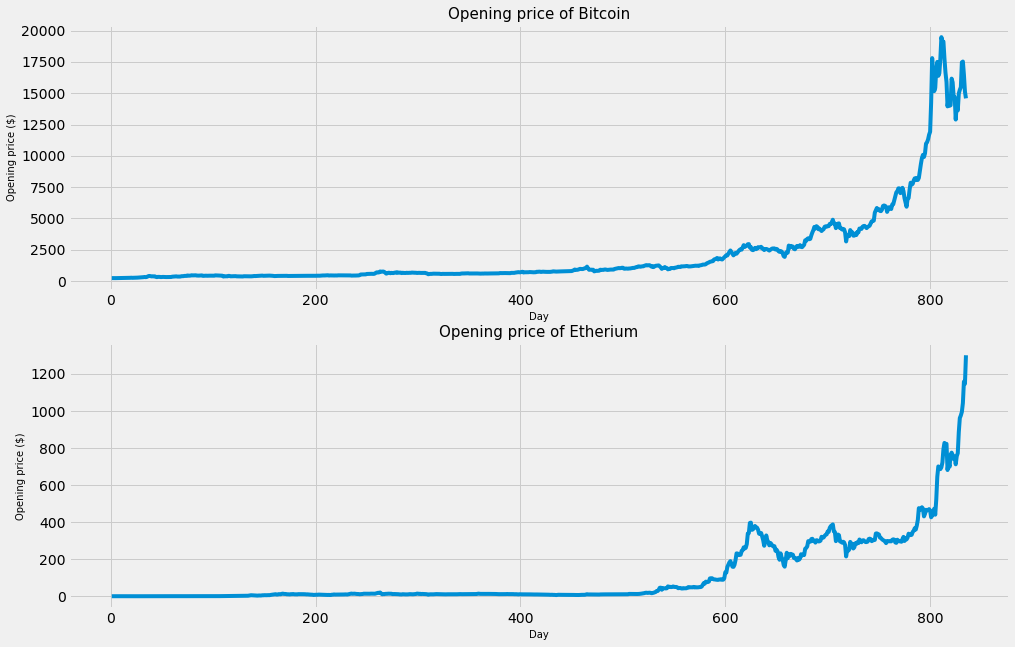

In [20]:
fig,(ax1,ax2)=plt.subplots(2, figsize=(15,10))
ax1.plot(btc_df.day, btc_df.open)
ax1.set_title("Opening price of Bitcoin", size=15)
ax1.set_xlabel("Day", size=10)
ax1.set_ylabel("Opening price ($)", size=10)
ax2.plot(eth_df.day, eth_df.open)
ax2.set_title("Opening price of Etherium", size=15)
ax2.set_xlabel("Day", size=10)
ax2.set_ylabel("Opening price ($)", size=10)

#### Question 10

Now, calculate the correlation coefficient between the opening prices of BTC and ETH.

In [21]:
def correlation(x, y):
    "Calculate the correlation between two arrays of real numbers."
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)

def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)

[correlation(btc_df.open,eth_df.open)]

[0.9250325764148283]

#### Question 11
Regardless of your conclusions above, write a function `eth_predictor` which takes an opening BTC price and predicts the price of ETH. Again, it will be helpful to use the function `regression_parameters` that you defined earlier in this homework.

In [21]:
def eth_predictor(btc_price):
    parameters = np.sum(((btc_df.open-btc_df.open.mean())/btc_df.open.std())*(eth_df.open-eth_df.open.mean())/eth_df.open.std())/(len(eth_df)-1)
    slope =np.cov(btc_df.open,eth_df.open)[1,0]/np.var(btc_df.open)
    intercept =eth_df["open"].mean()-slope*btc_df["open"].mean()
    return(btc_price*slope+intercept)

eth_predictor(10000)

506.324207415252

#### Question 12

Now, using the `eth_predictor` you defined in the previous question, make a scatter plot with BTC prices along the x-axis and both real and predicted ETH prices along the y-axis. The color of the dots for the real ETH prices should be different from the color for the predicted ETH prices.

Hints:
* An example of such a scatter plot is generated <a href= "https://inferentialthinking.com/chapters/15/2/Regression_Line.html"> here. </a>
* Think about the table or data frame that must be produced and used to generate this scatter plot. What data should the columns represent? Based on the data that you need, how many columns should be present? Also, what should each row represent? Constructing the table or data frame will be the main part of this question; once you have this, generating the scatter plot should be straightforward as usual.

Text(0, 0.5, 'ETH price ($)')

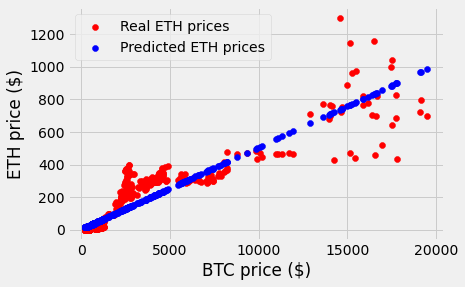

In [24]:
plt.scatter(btc_df.open,eth_df.open, color="r", label =  "Real ETH prices")
plt.scatter(btc_df.open,eth_predictor(btc_df.open),color="b", label = "Predicted ETH prices")
plt.legend()
plt.xlabel("BTC price ($)")
plt.ylabel("ETH price ($)")

#### Question 13
For what values of BTC should you be more confident of your predictions? Considering the shape of the scatter plot of the true data, is the model we used reasonable? If so, what features make this model reasonable? If not, what features make it unreasonable?

Given the graph above, I am more confident for lower values of BTC in making my prediction.  The model that we used is reasonable for smaller BTC values because the predicted values are close to the real values, but not very reasonable for larger BTC values, where the real values are quite far from the predicted values.  Thus, the model that we used is moderately reasonable, in that it is reasonable for lower prices and unreasonable for higher prices.

#### Question 14

Now suppose you want to go the other way: to predict a BTC  price given an ETH price. Which parameters among the return values of `regression_parameters` are the same for the BTC-vs-ETH regression?

In [22]:
#The slope is now the inverse of what it was previously, and the intercept is both negative and divided by the slope.  Only the r-value will remain the same.

## 4. Simulations and Confidence Intervals (5 points)

In this exercise we will construct confidence intervals for the population correlation parameter and we will use simulations to assess the validity of our procedure.

Reminder:  the bootstrap technique 
* takes multiple samples 
* from the empirical distribution (the observed sample frequencies)
* of the same size as the original sample
* and uses these "noisy" artificial samples to model the distribution of sampling statistics.

The following cell contains a function that generates a dataset of sample size n from a population with correlation parameter equal to r.

In [23]:
def cor_sim(r,n):
    x = np.random.normal(0, 1, n)
    z = np.random.normal(0, 1, n)
    y = r*x + np.sqrt(1 - r**2)*z  #  Weighted sum of x and z 
    df = pd.DataFrame()
    df['X'] = x
    df['Y'] = y
    return df

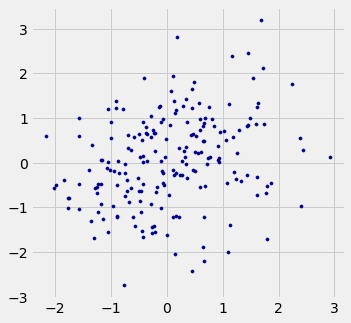

In [24]:
# run this to get a scatter plot of a simulated dataset
sim1_df=cor_sim(0.3,200)

plt.figure(figsize=(5,5))
plt.scatter(sim1_df.X, sim1_df.Y, s=10,c='darkblue')

#### Question 15

Write a function that calculates (for two given variables reflected in two columns of a data frame) a 95% confidence interval for the population correlation using bootrap sampling.  Then calculate a 95% CI for a dataset simulated with the function above.

In [25]:
#  a function that outputs a 95% CI for the correlation
# input is a data frame, the name of the two columns, and number of bootstraps
# output is an array of length three containing the correlation, and also
# the left and right ends of the 95% CI

def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)   

def correlation(x, y):
    "Calculate the correlation between two arrays of real numbers."
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)

correlations = []

def bootstrap_slope(df, x, y, repetitions):
    for i in range(repetitions):
        test = df.sample(200, replace = True)
        correlations.append(correlation(test[x], test[y]))
    left = np.percentile(correlations, 2.5)
    right = np.percentile(correlations, 97.5)
    cor = correlation(df[x], df[y])
    return(cor, left, right)

In [26]:
# run this cell to get a confidence interval for one simulated dataset

# a simulated data frame with population correlation 0.3
sim1_df=cor_sim(0.3,200)

bootstrap_slope(sim1_df,'X','Y',1000)

(0.41701497509482344, 0.2833124163796438, 0.522375435308535)

#### Question 16

Let us check that the bootstrap confidence bounds are correct.

Repeat this procedure (generate a random dataset) 100 times with the same specifications (n=200, r=0.3) and construct a data frame that has 100 rows (one for each simulation) and three columns:

- ObsCor: which contains the observed correlations in each simulated datasets;
- Left: contains the left ends of the 95% confidence intervals;
- Right: contains the right ends of the 95% confidence intervals.

In [27]:
# code here
ObsCor = []
Left = []
Right = []

for i in range(100):
    sim=cor_sim(0.3,200)
    taste = (bootstrap_slope(sim,'X','Y',1000))
    ObsCor.append(taste[0])
    Left.append(taste[1])
    Right.append(taste[2])

data = {"ObsCor": ObsCor, "Left": Left, "Right": Right}
sixteen = pd.DataFrame(data)
sixteen

#ask

,ObsCor,Left,Right
0,0.280411,0.170357,0.506828
1,0.382826,0.182714,0.509569
2,0.246835,0.155701,0.504785
3,0.320778,0.159351,0.498345
4,0.288160,0.163076,0.491919
...,...,...,...
95,0.340296,0.118262,0.465000
96,0.286126,0.118443,0.464621
97,0.323980,0.118798,0.464253
98,0.294699,0.119174,0.464064


#### Question 17

Calculate the number of intervals that contain the population value of the correlation (r=0.3). Is this number consistent to your expectation? 

In [28]:
# calculate number of intervals
x=0
for i in range(len(sixteen)):
    if (0.3 > Left[i]) and (0.3 < Right[i]):
        x+=1
print(x)

#This seems reasonable, as we would expect about 95% of the intervals above to include the population value.  However, to check this, we would want more random samples (more than just 100)

100


*Answer here:*  
